#  Time Series Decomposition

In this notebook, we decompose the **AirPassengers** dataset into three main components:

- **Trend**: Long-term movement in the data
- **Seasonality**: Repeating patterns at fixed intervals (e.g., yearly)
- **Residual**: Random noise not explained by trend or seasonality


In [6]:
import pandas as pd
import matplotlib.pyplot as plt


**Dataset:**

Air passengers data 

In [8]:
data = pd.read_csv('/kaggle/input/airpassengers-dataframe/AirPassengers.csv')

In [9]:
data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,112,118,132,129,121,135,148,148,136,119,104,118
1,115,126,141,135,125,149,170,170,158,133,114,140
2,145,150,178,163,172,178,199,199,184,162,146,166
3,171,180,193,181,183,218,230,242,209,191,172,194
4,196,196,236,235,229,243,264,272,237,211,180,201
5,204,188,235,227,234,264,302,293,259,229,203,229
6,242,233,267,269,270,315,364,347,312,274,237,278
7,284,277,317,313,318,374,413,405,355,306,271,306
8,315,301,356,348,355,422,465,467,404,347,305,336
9,340,318,362,348,363,435,491,505,404,359,310,337


Adding the year manually because that data is missing in the actually data

In [10]:
data['Year'] = list(range(1949, 1949 + len(data)))

In [20]:
data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,112,118,132,129,121,135,148,148,136,119,104,118,1949
1,115,126,141,135,125,149,170,170,158,133,114,140,1950
2,145,150,178,163,172,178,199,199,184,162,146,166,1951
3,171,180,193,181,183,218,230,242,209,191,172,194,1952
4,196,196,236,235,229,243,264,272,237,211,180,201,1953


changing the format of the data for proper analysis

In [11]:
df = data.melt(id_vars='Year', var_name='Month', value_name='Passengers')

In [12]:
df.head()

,Year,Month,Passengers
0,1949,Jan,112
1,1950,Jan,115
2,1951,Jan,145
3,1952,Jan,171
4,1953,Jan,196


conversion of year and month to proper data because timeseries works better on the datatime format data

In [13]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%b')
df.set_index('Date', inplace=True)
df = df[['Passengers']]

In [14]:
df.head()

,Passengers
Date,
1949-01-01,112
1950-01-01,115
1951-01-01,145
1952-01-01,171
1953-01-01,196


### Classical Decomposition (`seasonal_decompose()`)

We use the `seasonal_decompose()` function from `statsmodels`.

additive -> Observed = Trend + Seasonality + Residual
  - Use this when the seasonality stays constant (same up/down movement over time).
    
multiplicative -> Observed = Trend × Seasonality × Residual
  - Use this when seasonality grows with trend (e.g., bigger spikes as values rise).

In [15]:
df = df.sort_index()

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition - trying both models
result_add = seasonal_decompose(df['Passengers'], model='additive', period=12)
result_mul = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)


/tmp/ipykernel_36/2708344449.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


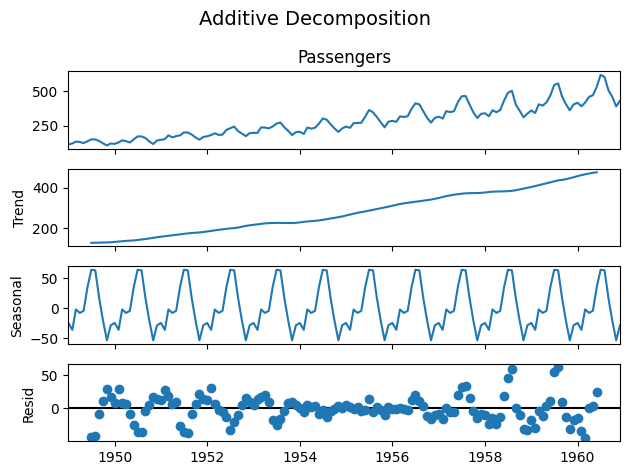

In [17]:
result_add.plot()
plt.suptitle("Additive Decomposition", fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipykernel_36/1133622841.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


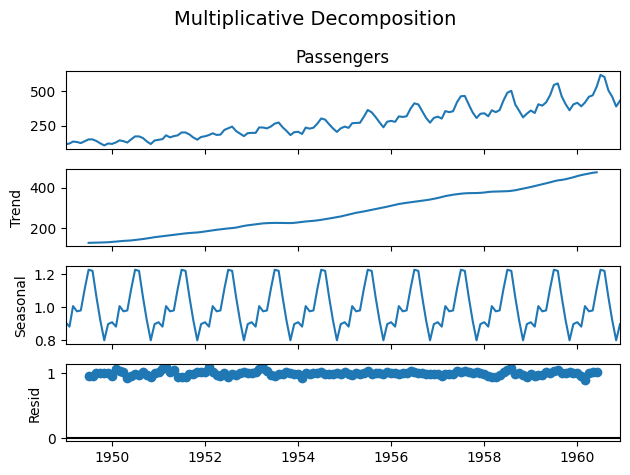

In [18]:
result_mul.plot()
plt.suptitle("Multiplicative Decomposition", fontsize=14)
plt.tight_layout()
plt.show()

**STL Decomposition (Seasonal-Trend-Loess)**

STL is a more robust method that uses local regression (Loess) to separate components.

- Works better with noisy or irregular data

- Allows custom tuning of seasonal/trend strength

- More stable than classical method when data has changing variance

In [19]:
from statsmodels.tsa.seasonal import STL

stl = STL(df['Passengers'], period=12)
res = stl.fit()

/tmp/ipykernel_36/3133811501.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


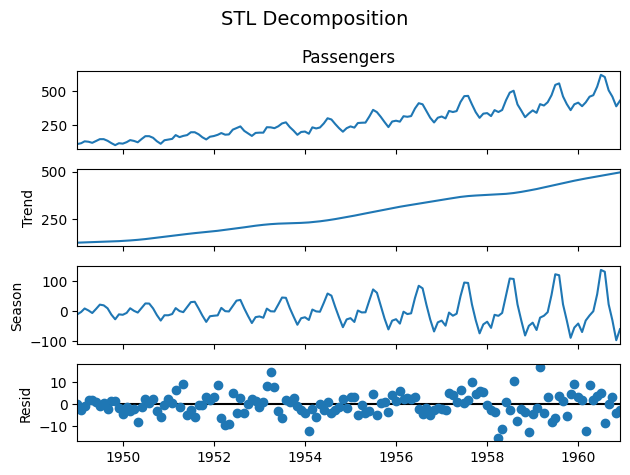

In [20]:
res.plot()
plt.suptitle("STL Decomposition", fontsize=14)
plt.tight_layout()
plt.show()

**Summary**

Use seasonal_decompose() for basic exploration and clean monthly data.

Use STL for more flexible, real-world decomposition needs.

Decomposition helps us better understand what drives our time series before modeling or forecasting.